<center><img src="https://media.licdn.com/dms/image/C5616AQEl062RQJTU5w/profile-displaybackgroundimage-shrink_200_800/0/1641678040511?e=2147483647&v=beta&t=p-yNlxF35m3WeuBiUOF-vVw6_0CLJEykvnJ6zxQKxPI" width="2000" height="150px"></center>

# Análise dos Dados do Airbnb - Los Angeles, California

O [Airbnb](https://www.airbnb.com.br/) é uma plataforma de hospedagem online que revolucionou a maneira como as pessoas viajam, oferecendo uma ampla variedade de acomodações únicas, desde apartamentos urbanos até casas de campo e experiências autênticas organizadas por anfitriões locais. O detalhe é que ele **não possui nenhum hotel**.

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

A empresa nasceu em 2007, hoje 17 anos depois a plataforma já recebeu mais de **1,5 bilhões** de hóspedes espalhados pelo o mundo.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://logosmarcas.net/wp-content/uploads/2020/07/Airbnb-Logo.png"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Los Angeles, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Dados obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para uma análise exploratória inicial será, será baixado o arquivo:
* `listings.csv` - *Summary information and metrics for listings in Los Angeles (good for visualisations).*

In [ ]:
# importando bibliotecas necessarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("https://data.insideairbnb.com/united-states/ca/los-angeles/2023-12-03/visualisations/listings.csv")

## Análise dos Dados

Esta é uma etapa inicial que tem como finalidade vizualizar a base de dados e permitir um entendimento de como os dados estão organizados.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias
* `number_of_reviews_ltm` - Número de reviews de taxa de ocupação
* `license` - Número da licensa

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as entradas.

In [ ]:
# mostrar as entradas do dataset
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,109,Condo in Culver City · 2 bedrooms · 2 beds · 2...,521,Paolo,Other Cities,Culver City,33.98301,-118.38607,Entire home/apt,129,30,2,2016-05-15,0.01,1,180,0,NaN
1,2708,Rental unit in Los Angeles · ★4.85 · 1 bedroom...,3008,Chas.,City of Los Angeles,Hollywood,34.09625,-118.34605,Private room,94,30,40,2023-07-31,0.35,2,271,2,NaN
2,2732,Rental unit in Santa Monica · ★4.41 · 1 bedroo...,3041,Yoga Priestess,Other Cities,Santa Monica,34.00440,-118.48095,Private room,179,7,24,2022-08-21,0.16,2,360,0,228269
3,63416,Home in Hollywood · ★4.99 · 1 bedroom · 2 beds...,309512,Vincenzo,City of Los Angeles,Hollywood Hills,34.11344,-118.32399,Private room,220,2,161,2023-11-18,1.02,3,0,23,HSR21-000113
4,2864,Rental unit in Bellflower · 1 bedroom · 1 bed ...,3207,Bernadine,Other Cities,Bellflower,33.87490,-118.11515,Entire home/apt,50,30,0,NaN,NaN,1,0,0,NaN


### **Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Aqui listamos as variáveis e as entradas, este *dataset* é uma versão resumida, possuindo 45595 entradas e 18 variáveis. Há uma versão mais completa no site [Inside Airbnb](https://insideairbnb.com/get-the-data/)

In [ ]:
# identificar o volume de dados do DataFrame
print(f"Variáveis:{df.shape[1]}")
print(f"Entradas:{df.shape[0]}")

# verificando os tipo de variáveis
display(df.dtypes)

Variáveis:18
Entradas:45595


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

É de suma importância saber os tipos de variáveis que iremos trabalhar, pensando nisso, usamos o método `dtypes` para obter essa informação.

### **Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível notar que a coluna `license` possui 73% de seus valores faltando.
* A coluna `reviews_per_month` e `last_review` tem aproximadamente 27% de seus valores ausentes.
* A coluna `host_name` apresenta 0,04% de valores ausentes

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

license                           0.737493
reviews_per_month                 0.277377
last_review                       0.277377
host_name                         0.000439
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
name                              0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Qual o tipo de distribuição das variáveis?**

Para ser feita a distribuição de variáveis, foi feita a plotagem de histogramas.

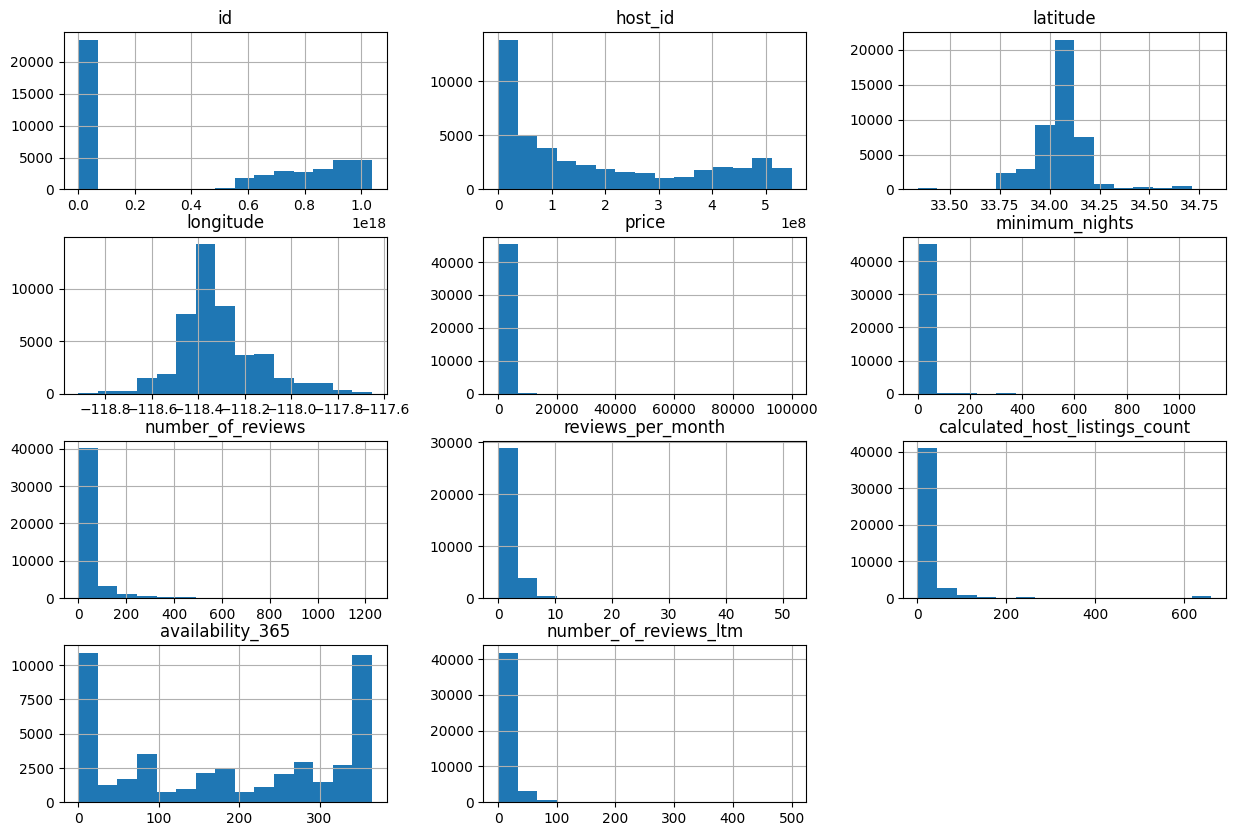

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15, 10));

### **Há outliers presentes?**

Através do histograma é possivel verificar indícios de *outliers* nas variáveis `price`, `minimum_nigths` e `calculated_host_listings_count`.

Os valores não segue uma distribuição e acaba distorcendo toda a apresentação gráfica. Para confirmar a presença de outliers iremos fazer um resumo estatístico através do método `describe()` setando apenas variáveis numéricas, em seguida plotar `boxplots` para as variáveis mais pertinentes para nossa análise, `price` e `minimum_nigths`.

In [ ]:
# Analisar resumo estatístico das variáveis numericas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,45595.000000,45595.000000,45595.000000,32948.000000,45595.000000,45595.000000
mean,292.428117,17.647023,33.515144,1.439343,22.505297,185.083979
std,1034.911930,27.886409,73.784307,1.700374,82.546342,141.429563
min,5.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,90.000000,2.000000,0.000000,0.230000,1.000000,32.000000
50%,148.000000,7.000000,5.000000,0.760000,2.000000,179.000000
75%,249.000000,30.000000,31.000000,2.190000,10.000000,337.000000
max,99999.000000,1124.000000,1227.000000,51.550000,662.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:
* A variável `price` possui desvio padrão muito alto em relação a média, outro dado a ser observado é que essa variável possui 75% do valor abaixo de 249, sendo que seu valor máximo é de 99999.

* É possível notar que a variável `minimum_nigths` possui um desvio padrão de 10 valores acima da média, 75% dos seus valores são abaixo de 30, porém a máxima é de 1124.

## Boxplot para price

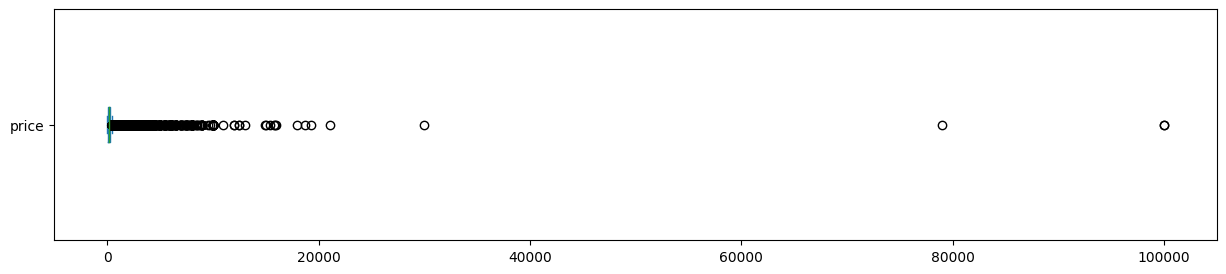


price: valores acima de 2000
988 entradas
2.1669%


In [ ]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

### Boxplot de minimum_nigths

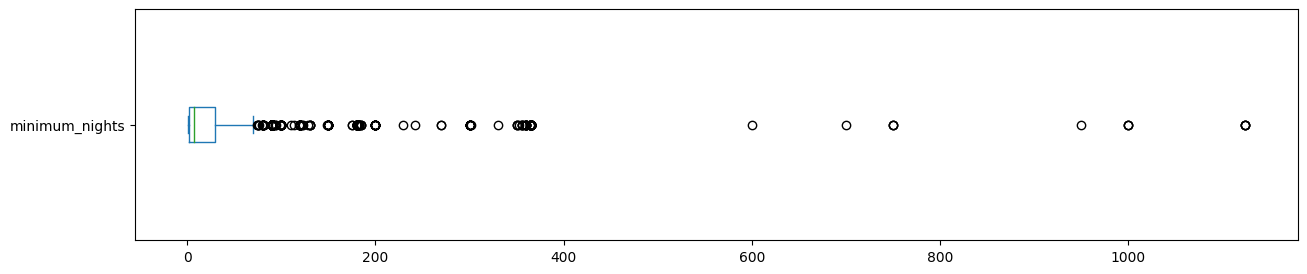

minimum_nights: valores acima de 30:
5483 entradas
12.0254%


In [ ]:
# minimum_nigths
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 25 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

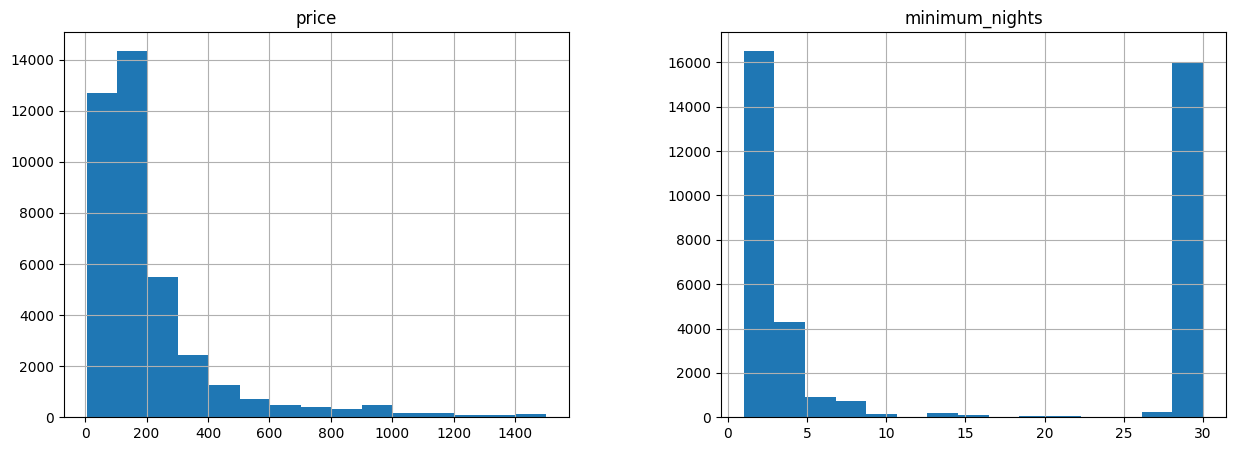

In [ ]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean[['price', 'minimum_nights']].hist(bins=15, figsize=(15,5));

### **Qual a correlação existente entre as variáveis**

Iremos plotar uma matriz e um headmap de correlação, para verificar se existe alguma correlação entre as variáveis.

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.041526,-0.080530,-0.056309,0.216002,0.071668
minimum_nights,-0.041526,1.000000,-0.189279,-0.447133,-0.018480,0.036016
number_of_reviews,-0.080530,-0.189279,1.000000,0.572172,-0.115052,-0.072860
reviews_per_month,-0.056309,-0.447133,0.572172,1.000000,-0.071536,-0.077467
calculated_host_listings_count,0.216002,-0.018480,-0.115052,-0.071536,1.000000,0.110762
availability_365,0.071668,0.036016,-0.072860,-0.077467,0.110762,1.000000


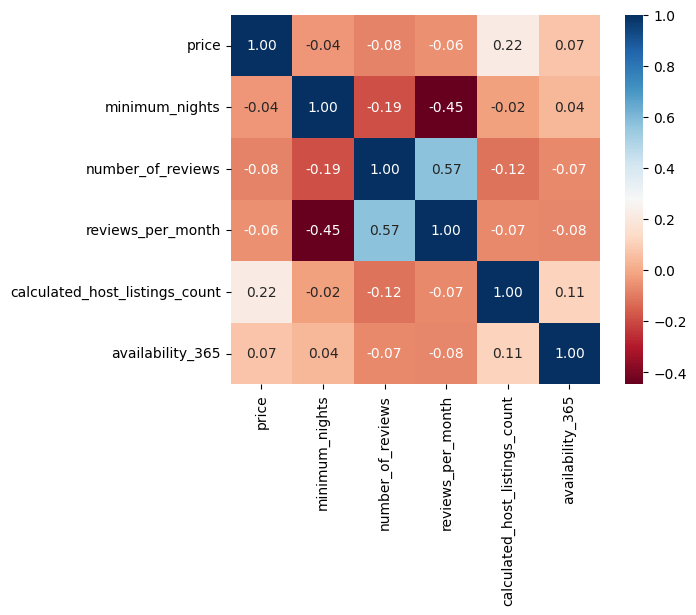

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

room_type
Entire home/apt    28487
Private room        9991
Shared room          693
Hotel room            60
Name: count, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df.shape[0]

room_type
Entire home/apt    0.624783
Private room       0.219125
Shared room        0.015199
Hotel room         0.001316
Name: count, dtype: float64

### **Qual a localidade mais cara de Los Angeles?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [ ]:
# ver preços por bairros, na média
df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:9]

neighbourhood
Bel-Air                                  3486.576923
Beverly Crest                            1763.227273
Malibu                                   1338.408676
Hollywood Hills West                     1189.910061
Unincorporated Santa Monica Mountains     821.849741
Rancho Palos Verdes                       707.396825
Palos Verdes Estates                      672.535714
Beverly Hills                             630.313533
Pacific Palisades                         615.885246
Name: price, dtype: float64

Foi lisatdo acima os 10 bairros mais caros de Los-Angeles. Liderando a lista, *Bel-Air* é o bairro mais caro pra se morar na cidade, logo atrás situado na mesma região, aparece *Beverly Crest*. Bairros famosos como *Hollywood Hills West* e *Beverly Hills*, Conhecidos pelas suas grandes mansões de luxo, lojas de grife, sendo a escolhidos por muitos famosos como local de residência pelo estilo de vida luxuoso, não apareceram no top 3

### **Grafico de dispersão**

Abaixo foi feita a plotagem de um gráfico de dispersão, com o intuito de formar um pequeno mapa da região dos imóveis, isso foi possível graças aos dados de `longitude`(traçado no eixo X) e `latitude`(traçado no eixo Y) da cada casa/apartamento, cada cor indica uma faixa de preço, é possível vizualizar regiões mais caras apenas observando cada ponto colorido.

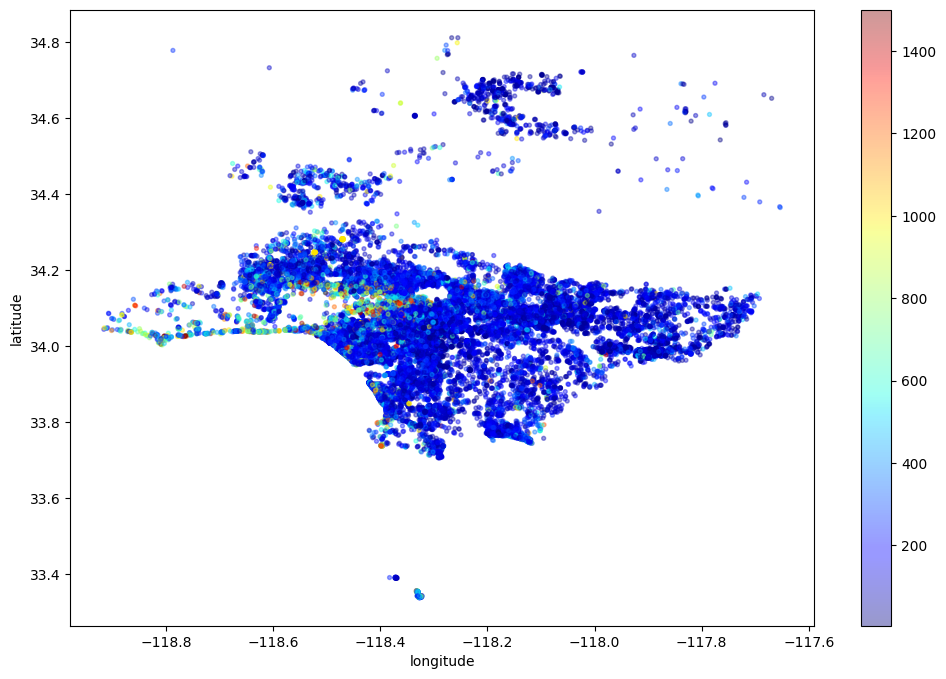

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusões


Foi feita apenas uma pequena análise exploratória com base no dataset resumido do Airbnb. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completo com 106 atributos disponíveis.

Ainda assim, percebeu-se a existência de *outliers* em algumas variáveis.
Notou-se que o mínimo de noites(`minimum_nights`) que as pessoas alugam, estão bem divididos, muitas pessoas alugam entre 0 e 5 noites, porém uma boa quantidade alugam entre 25 e 30 noites.

Foi visto que a grande maioria dos clientes Airbnb em Los-Angeles alugaram imóveis numa faixa de preço(`price`) menor, entre 0 e 200, detalhe que pode ser observado no gráfico de `latitude` e `longitude`